In [1]:

# implementation 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
pd.set_option('display.max_columns', 70)

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
import pandas as pd

titanic = pd.read_csv('https://raw.githubusercontent.com/learn-co-students/nyc-ds-033020-lectures/master/Mod_3/knn/cleaned_titanic.csv', index_col='PassengerId')
titanic['youngin'] = titanic['youngin'].astype('int')

In [4]:
# Split data to be used in the models
# Create matrix of features
X = titanic.drop('Survived', axis = 1) # grabs everything else but 'Survived'

# Create target variable
y = titanic['Survived'] # y is the column we're trying to predict

In [5]:
polynomial_features_2= PolynomialFeatures(degree=2, include_bias=False)

In [6]:
X_poly = polynomial_features_2.fit_transform(X)
poly_columns = polynomial_features_2.get_feature_names(X.columns)

In [7]:
X_poly  = pd.DataFrame(X_poly , columns=poly_columns)
X_poly.head()

,Pclass,Age,SibSp,Parch,Fare,youngin,male,Q,S,Pclass^2,Pclass Age,Pclass SibSp,Pclass Parch,Pclass Fare,Pclass youngin,Pclass male,Pclass Q,Pclass S,Age^2,Age SibSp,Age Parch,Age Fare,Age youngin,Age male,Age Q,Age S,SibSp^2,SibSp Parch,SibSp Fare,SibSp youngin,SibSp male,SibSp Q,SibSp S,Parch^2,Parch Fare,Parch youngin,Parch male,Parch Q,Parch S,Fare^2,Fare youngin,Fare male,Fare Q,Fare S,youngin^2,youngin male,youngin Q,youngin S,male^2,male Q,male S,Q^2,Q S,S^2
0,3.0,22.0,1.0,0.0,7.2500,0.0,1.0,0.0,1.0,9.0,66.0,3.0,0.0,21.7500,0.0,3.0,0.0,3.0,484.0,22.0,0.0,159.5000,0.0,22.0,0.0,22.0,1.0,0.0,7.2500,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,52.562500,0.0,7.25,0.0,7.250,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,1.0,38.0,1.0,0.0,71.2833,0.0,0.0,0.0,0.0,1.0,38.0,1.0,0.0,71.2833,0.0,0.0,0.0,0.0,1444.0,38.0,0.0,2708.7654,0.0,0.0,0.0,0.0,1.0,0.0,71.2833,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5081.308859,0.0,0.00,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,26.0,0.0,0.0,7.9250,0.0,0.0,0.0,1.0,9.0,78.0,0.0,0.0,23.7750,0.0,0.0,0.0,3.0,676.0,0.0,0.0,206.0500,0.0,0.0,0.0,26.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62.805625,0.0,0.00,0.0,7.925,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,0.0,1.0,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,0.0,1.0,1225.0,35.0,0.0,1858.5000,0.0,0.0,0.0,35.0,1.0,0.0,53.1000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2819.610000,0.0,0.00,0.0,53.100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,3.0,35.0,0.0,0.0,8.0500,0.0,1.0,0.0,1.0,9.0,105.0,0.0,0.0,24.1500,0.0,3.0,0.0,3.0,1225.0,0.0,0.0,281.7500,0.0,35.0,0.0,35.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64.802500,0.0,8.05,0.0,8.050,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


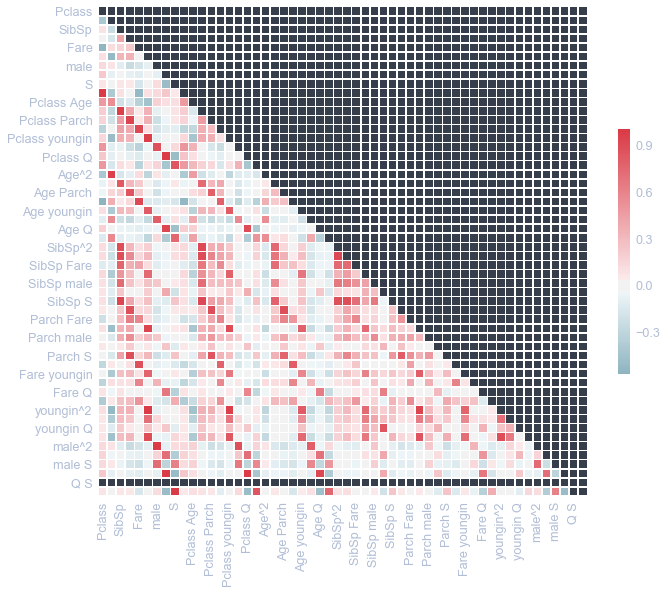

In [8]:
# sns.set(style="white")


# Compute the correlation matrix
corr = X_poly.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [9]:
# Create correlation matrix
corr_matrix = X_poly.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper

,Pclass,Age,SibSp,Parch,Fare,youngin,male,Q,S,Pclass^2,Pclass Age,Pclass SibSp,Pclass Parch,Pclass Fare,Pclass youngin,Pclass male,Pclass Q,Pclass S,Age^2,Age SibSp,Age Parch,Age Fare,Age youngin,Age male,Age Q,Age S,SibSp^2,SibSp Parch,SibSp Fare,SibSp youngin,SibSp male,SibSp Q,SibSp S,Parch^2,Parch Fare,Parch youngin,Parch male,Parch Q,Parch S,Fare^2,Fare youngin,Fare male,Fare Q,Fare S,youngin^2,youngin male,youngin Q,youngin S,male^2,male Q,male S,Q^2,Q S,S^2
Pclass,NaN,0.405549,0.081656,0.016824,0.548193,0.104190,0.127741,0.220558,0.076466,0.993284,0.477301,0.194339,0.160620,0.317122,0.141809,0.501639,0.235594,0.497822,0.405303,0.066361,0.040453,0.563423,0.106688,0.101962,0.187702,0.133358,0.122429,0.124839,0.121130,0.130312,0.088556,0.072570,0.100380,0.054779,0.212234,0.087608,0.004332,0.060982,0.039831,0.283651,0.006150,0.307680,0.074089,0.377868,0.104190,0.065358,0.055478,0.075229,0.127741,0.162164,0.131041,0.220558,NaN,0.076466
Age,NaN,NaN,0.242807,0.170089,0.120938,0.517150,0.083730,0.080875,0.013598,0.397380,0.547827,0.278138,0.192551,0.020461,0.501789,0.102045,0.089588,0.155495,0.952684,0.074841,0.155352,0.369975,0.388210,0.554774,0.013247,0.571350,0.177076,0.223325,0.100850,0.379725,0.189881,0.107698,0.210078,0.031981,0.021493,0.479864,0.144809,0.017762,0.150332,0.060165,0.398010,0.106764,0.041303,0.058655,0.517150,0.369544,0.121038,0.453500,0.083730,0.038506,0.056530,0.080875,NaN,0.013598
SibSp,NaN,NaN,NaN,0.414542,0.160887,0.330293,0.116348,0.026692,0.069438,0.085931,0.207735,0.974283,0.447549,0.426091,0.358753,0.071212,0.030169,0.111562,0.170268,0.823328,0.196140,0.053909,0.306183,0.216614,0.061042,0.105437,0.881671,0.880982,0.759063,0.500619,0.726267,0.228826,0.927300,0.230900,0.281970,0.328443,0.370575,0.057643,0.429773,0.032466,0.274142,0.094406,0.083622,0.257639,0.330293,0.285900,0.211839,0.291855,0.116348,0.017057,0.067642,0.026692,NaN,0.069438
Parch,NaN,NaN,NaN,NaN,0.217532,0.346635,0.247508,0.081585,0.061512,0.016484,0.133801,0.400555,0.944555,0.392622,0.332526,0.224228,0.078886,0.064870,0.087963,0.315126,0.849833,0.137806,0.294849,0.273704,0.074582,0.062866,0.320331,0.562534,0.360956,0.275563,0.254191,0.024159,0.411382,0.874698,0.619486,0.384992,0.540849,0.211702,0.887374,0.098984,0.306256,0.098136,0.020580,0.295555,0.346635,0.237868,0.051491,0.319470,0.247508,0.071040,0.174840,0.081585,NaN,0.061512
Fare,NaN,NaN,NaN,NaN,NaN,0.008379,0.179958,0.116684,0.163758,0.518321,0.340080,0.062695,0.068755,0.909252,0.026485,0.320516,0.124026,0.317594,0.124850,0.216877,0.218098,0.915077,0.014188,0.100407,0.105209,0.096499,0.101183,0.149266,0.412955,0.001683,0.081588,0.004786,0.119534,0.130052,0.584153,0.010266,0.172737,0.012433,0.153882,0.866095,0.079512,0.600099,0.015989,0.510889,0.008379,0.003584,0.004022,0.001711,0.179958,0.080826,0.207436,0.116684,NaN,0.163758
youngin,NaN,NaN,NaN,NaN,NaN,NaN,0.076252,0.021512,0.040392,0.095793,0.450017,0.342410,0.353128,0.105895,0.975276,0.044231,0.019381,0.072309,0.300358,0.037465,0.034359,0.134128,0.813867,0.267628,0.065881,0.282117,0.192279,0.298199,0.119316,0.746455,0.259781,0.194758,0.270745,0.144344,0.104191,0.932918,0.301518,0.069037,0.309346,0.030607,0.762911,0.003537,0.035769,0.050270,1.000000,0.705735,0.245536,0.882095,0.076252,0.024016,0.042008,0.021512,NaN,0.040392
male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.075217,0.121405,0.131843,0.173907,0.082424,0.221790,0.185347,0.078243,0.867233,0.072493,0.161356,0.075746,0.144453,0.199376,0.141902,0.080499,0.799071,0.055060,0.130360,0.038549,0.087380,0.108696,0.021002,0.233383,0.027175,0.090338,0.181811,0.129879,0.076694,0.222525,0.040944,0.209780,0.077515,0.040138,0.331042,0.040576,0.125189,0.076252,0.142093,0.049437,0.059933,1.000000,0.161690,0.729575,0.075217,NaN,0.121405
Q,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.499261,0.229168,0.103448,0.007634,0.056168,0.100328,0.012337,0.001700,0.991406,0.420679,0.088276,0.054624,0.056467,0.111645,0.002904,0.088859,0.922553,0.377009,0.017411,0.052160,0.049320,0.038161,0.016014,0.388075,0.119612,0.03

In [10]:
# Find index of feature columns with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.97)]
X_poly.drop(columns=to_drop, inplace=True)


In [11]:
X_poly.head()

,Pclass,Age,SibSp,Parch,Fare,youngin,male,Q,S,Pclass Age,Pclass Parch,Pclass Fare,Pclass male,Pclass S,Age^2,Age SibSp,Age Parch,Age Fare,Age youngin,Age male,Age Q,Age S,SibSp^2,SibSp Parch,SibSp Fare,SibSp youngin,SibSp male,SibSp Q,SibSp S,Parch^2,Parch Fare,Parch youngin,Parch male,Parch Q,Parch S,Fare^2,Fare youngin,Fare male,Fare Q,Fare S,youngin male,youngin Q,youngin S,male Q,male S,Q S
0,3.0,22.0,1.0,0.0,7.2500,0.0,1.0,0.0,1.0,66.0,0.0,21.7500,3.0,3.0,484.0,22.0,0.0,159.5000,0.0,22.0,0.0,22.0,1.0,0.0,7.2500,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,52.562500,0.0,7.25,0.0,7.250,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,38.0,1.0,0.0,71.2833,0.0,0.0,0.0,0.0,38.0,0.0,71.2833,0.0,0.0,1444.0,38.0,0.0,2708.7654,0.0,0.0,0.0,0.0,1.0,0.0,71.2833,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5081.308859,0.0,0.00,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,26.0,0.0,0.0,7.9250,0.0,0.0,0.0,1.0,78.0,0.0,23.7750,0.0,3.0,676.0,0.0,0.0,206.0500,0.0,0.0,0.0,26.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62.805625,0.0,0.00,0.0,7.925,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,0.0,1.0,35.0,0.0,53.1000,0.0,1.0,1225.0,35.0,0.0,1858.5000,0.0,0.0,0.0,35.0,1.0,0.0,53.1000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2819.610000,0.0,0.00,0.0,53.100,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,35.0,0.0,0.0,8.0500,0.0,1.0,0.0,1.0,105.0,0.0,24.1500,3.0,3.0,1225.0,0.0,0.0,281.7500,0.0,35.0,0.0,35.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64.802500,0.0,8.05,0.0,8.050,0.0,0.0,0.0,0.0,1.0,0.0


In [12]:
X_poly.shape

(889, 46)

In [13]:
X_poly.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'youngin', 'male', 'Q', 'S',
       'Pclass Age', 'Pclass Parch', 'Pclass Fare', 'Pclass male', 'Pclass S',
       'Age^2', 'Age SibSp', 'Age Parch', 'Age Fare', 'Age youngin',
       'Age male', 'Age Q', 'Age S', 'SibSp^2', 'SibSp Parch', 'SibSp Fare',
       'SibSp youngin', 'SibSp male', 'SibSp Q', 'SibSp S', 'Parch^2',
       'Parch Fare', 'Parch youngin', 'Parch male', 'Parch Q', 'Parch S',
       'Fare^2', 'Fare youngin', 'Fare male', 'Fare Q', 'Fare S',
       'youngin male', 'youngin Q', 'youngin S', 'male Q', 'male S', 'Q S'],
      dtype='object')

In [14]:
# Use x and y variables to split the training data into train and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state=1)

In [15]:
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

In [16]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
# class predictions (not predicted probabilities)
y_pred_class = logreg.predict(X_test)

In [18]:
lr_acc = metrics.accuracy_score(y_test, y_pred_class)
print('Accuracy Score:', lr_acc)

Accuracy Score: 0.8116591928251121


In [19]:
logreg.coef_

array([[-0.98660111, -0.2055155 ,  0.00432313,  1.27319967,  0.45745576,
         0.44062606, -1.45574933,  0.24338452, -0.56870916, -0.30500757,
        -0.5698578 ,  0.27651151,  1.05927237,  0.05046454, -0.23031218,
         0.24611161, -0.43998389,  0.33062233, -0.2334754 , -0.24260083,
         0.21399748,  0.96922046, -0.68591949,  0.42942134,  0.43903349,
        -0.43521412, -0.2085734 ,  0.38018001, -0.58257175, -0.00289117,
        -0.41457396,  0.38813948, -0.16329885, -1.07233465, -0.33341551,
        -0.75123106, -0.32467556, -0.10876237,  0.06708845, -0.11478495,
         0.90497173, -0.33257101, -0.01216712, -0.69018986, -0.4895146 ,
         0.        ]])

In [20]:
lr_coef_df = pd.DataFrame(data=logreg.coef_)
lr_coef_df.columns = X_poly.columns

In [21]:
lr_coef_df.T

,0
Pclass,-0.986601
Age,-0.205515
SibSp,0.004323
Parch,1.273200
Fare,0.457456
youngin,0.440626
male,-1.455749
Q,0.243385
S,-0.568709
Pclass Age,-0.305008


In [22]:
lr_coef_df = lr_coef_df.T.sort_values(by=0).T

In [23]:
sorted_df = lr_coef_df.T

In [24]:
sorted_df.shape

(46, 1)

In [25]:
sorted_df.iloc[sorted_df[0].abs().argsort()][::-1].head(10)

,0
male,-1.455749
Parch,1.273200
Parch Q,-1.072335
Pclass male,1.059272
Pclass,-0.986601
Age S,0.969220
youngin male,0.904972
Fare^2,-0.751231
male Q,-0.690190
SibSp^2,-0.685919


In [26]:
lr_coefs = sum(sorted_df[0].abs())

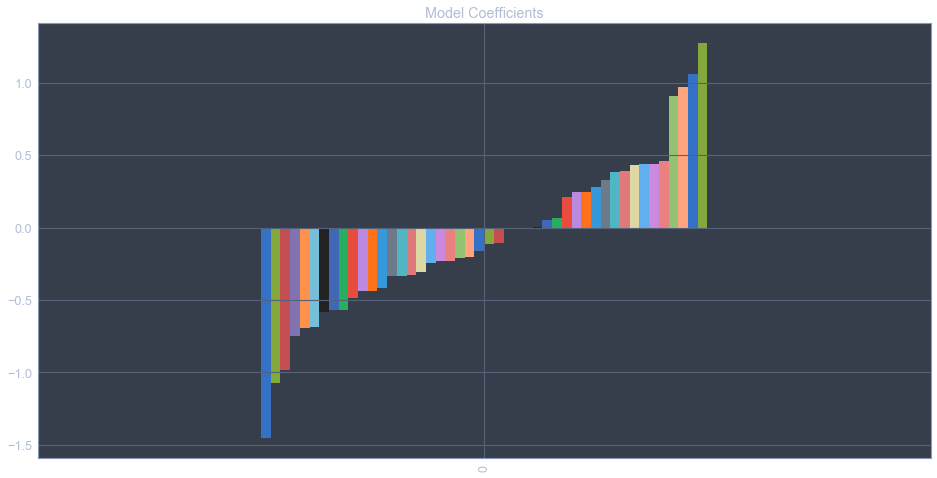

In [27]:
lr_coef_df.plot(kind='bar', title='Model Coefficients', legend=False, figsize=(16,8))

# Efficiently searching for optimal tuning parameters ([video #8](https://www.youtube.com/watch?v=Gol_qOgRqfA&list=PL5-da3qGB5ICeMbQuqbbCOQWcS6OYBr5A&index=8))

Created by [Data School](http://www.dataschool.io/). Watch all 9 videos on [YouTube](https://www.youtube.com/playlist?list=PL5-da3qGB5ICeMbQuqbbCOQWcS6OYBr5A). Download the notebooks from [GitHub](https://github.com/justmarkham/scikit-learn-videos).

**Note:** This notebook uses Python 3.6 and scikit-learn 0.19.1. The original notebook (shown in the video) used Python 2.7 and scikit-learn 0.16, and can be downloaded from the [archive branch](https://github.com/justmarkham/scikit-learn-videos/tree/archive).


## Agenda

- How can K-fold cross-validation be used to search for an **optimal tuning parameter**?
- How can this process be made **more efficient**?
- How do you search for **multiple tuning parameters** at once?
- What do you do with those tuning parameters before making **real predictions**?
- How can the **computational expense** of this process be reduced?

Gridsearch CV is a flexible algorithm in sklearn that allows you to search over multiple hyperparameters for a model, to find which combination of hyperparameters creates a model that performs best along some evaluation metric.

**Read through the documentation for GridsearchCV and determine which parameters are required for the algorithm to run.**

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV


In [28]:
# GridSearchCV()

**How do we alter this object in order to use a specific evaluation metric like precision or recall?**


## More efficient parameter tuning using `GridSearchCV`

Allows you to define a **grid of parameters** that will be **searched** using K-fold cross-validation


In [29]:
lrl2 = LogisticRegression()

In [30]:
c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

In [31]:
param_grid = {'C': c_range }


In [57]:
grid = GridSearchCV(LogisticRegression(penalty='l2'), param_grid, verbose=2)


In [58]:

# fit the grid with data
grid.fit(X_train, y_train)


Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] C=0.001 .........................................................
[CV] .......................................... C=0.001, total=   0.0s
[CV] C=0.001 .........................................................
[CV] .......................................... C=0.001, total=   0.0s
[CV] C=0.001 .........................................................
[CV] .......................................... C=0.001, total=   0.0s
[CV] C=0.001 .........................................................
[CV] .......................................... C=0.001, total=   0.0s
[CV] C=0.001 .........................................................
[CV] .......................................... C=0.001, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] ............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............................................ C=0.1, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................................ C=0.1, total=   0.0s
[CV] C=1 .............................................................
[CV] .............................................. C=1, total=   0.0s
[CV] C=1 .............................................................
[CV] .............................................. C=1, total=   0.0s
[CV] C=1 .............................................................
[CV] .............................................. C=1, total=   0.0s
[CV] C=1 .............................................................
[CV] .............................................. C=1, total=   0.0s
[CV] C=1 .............................................................
[CV] .............................................. C=1, total=   0.0s
[CV] C=10 ............................................................
[CV] .

/Users/eric/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/eric/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_m

[CV] ............................................. C=10, total=   0.1s
[CV] C=10 ............................................................
[CV] ............................................. C=10, total=   0.1s
[CV] C=100 ...........................................................
[CV] ............................................ C=100, total=   0.1s
[CV] C=100 ...........................................................


/Users/eric/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/eric/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_m

[CV] ............................................ C=100, total=   0.1s
[CV] C=100 ...........................................................
[CV] ............................................ C=100, total=   0.1s
[CV] C=100 ...........................................................
[CV] ............................................ C=100, total=   0.1s
[CV] C=100 ...........................................................


/Users/eric/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/eric/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_m

[CV] ............................................ C=100, total=   0.1s
[CV] C=1000 ..........................................................
[CV] ........................................... C=1000, total=   0.1s
[CV] C=1000 ..........................................................
[CV] ........................................... C=1000, total=   0.1s
[CV] C=1000 ..........................................................
[CV] ........................................... C=1000, total=   0.1s
[CV] C=1000 ..........................................................
[CV] ........................................... C=1000, total=   0.1s
[CV] C=1000 ..........................................................
[CV] ........................................... C=1000, total=   0.1s


/Users/eric/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/eric/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_m

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [34]:
grid.cv_results_

{'mean_fit_time': array([0.00740471, 0.00866437, 0.01109738, 0.02900181, 0.03549042,
        0.03654523, 0.03770189]),
 'std_fit_time': array([0.00186406, 0.00230151, 0.00113339, 0.00877233, 0.00279796,
        0.00566234, 0.00738816]),
 'mean_score_time': array([0.00092931, 0.0006362 , 0.00059757, 0.00069618, 0.0008328 ,
        0.00127316, 0.001231  ]),
 'std_score_time': array([2.92601338e-04, 1.05851792e-04, 1.48512661e-04, 2.01452103e-04,
        9.70074777e-05, 4.17837467e-04, 8.93952227e-04]),
 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1, 10, 100, 1000],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001},
  {'C': 0.01},
  {'C': 0.1},
  {'C': 1},
  {'C': 10},
  {'C': 100},
  {'C': 1000}],
 'split0_test_score': array([0.75373134, 0.82089552, 0.80597015, 0.81343284, 0.8358209 ,
        0.8358209 , 0.82835821]),
 'split1_test_score': array([0.72932331, 0.80451128, 0.78947368, 0.7744

In [35]:
# view the results as a pandas DataFrame
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.720671,0.020430,{'C': 0.001}
1,0.810796,0.013133,{'C': 0.01}
2,0.807811,0.013894,{'C': 0.1}
3,0.801784,0.015682,{'C': 1}
4,0.800247,0.022489,{'C': 10}
5,0.798743,0.027809,{'C': 100}
6,0.797251,0.025915,{'C': 1000}


In [36]:
# examine the first result
print(grid.cv_results_['params'][0])
print(grid.cv_results_['mean_test_score'][0])

{'C': 0.001}
0.7206710806867915


In [37]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)


0.8107956458309955
{'C': 0.01}
LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)



## Searching multiple parameters simultaneously

- **Example:** tuning `max_depth` and `min_samples_leaf` for a `DecisionTreeClassifier`
- Could tune parameters **independently**: change `max_depth` while leaving `min_samples_leaf` at its default value, and vice versa
- But, best performance might be achieved when **neither parameter** is at its default value


In [38]:
# define the parameter values that should be searched
penalty = ['l1', 'l2']

In [39]:
# create a parameter grid: map the parameter names to the values that should be searched
param_grid2 = dict(C=c_range, penalty=penalty)
print(param_grid2)

{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']}


In [40]:
grid2 = GridSearchCV(LogisticRegression(), param_grid2, verbose=1, cv=7)


In [41]:
grid2.fit(X_train, y_train)


Fitting 7 folds for each of 14 candidates, totalling 98 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/eric/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Users/eric/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Users/eric/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs suppor

/Users/eric/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/eric/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_m

GridSearchCV(cv=7, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [42]:
# examine the best model
print(grid2.best_score_)
print(grid2.best_params_)
print(grid2.best_estimator_)

0.8108082706766918
{'C': 0.1, 'penalty': 'l2'}
LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


### Your Turn

Use Grid search to find the best hyperparameters for a KNN model. You must use at least 2 different hyperparameters. 

In [43]:
#your code here

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
knn = KNeighborsClassifier()

In [61]:
# Params to loop over
neighbors = list(range(1,15,2))
algos = ['kd_tree', 'brute']
metrics = ['euclidean', 'manhattan', 'minkowski']
weights = ['']

knn_param_grid = {'n_neighbors':neighbors, 'algorithm':algos, 'metric':metrics}

In [62]:
grid3 = GridSearchCV(knn, knn_param_grid, verbose=1, cv=7)
grid3.fit(X_train, y_train)

Fitting 7 folds for each of 42 candidates, totalling 294 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 294 out of 294 | elapsed:    2.7s finished


GridSearchCV(cv=7, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [1, 3, 5, 7, 9, 11, 13]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

## Reducing computational expense using `RandomizedSearchCV`

- Searching many different parameters at once may be computationally infeasible
- `RandomizedSearchCV` searches a subset of the parameters, and you control the computational "budget"


In [64]:
from sklearn.model_selection import RandomizedSearchCV

# specify "parameter distributions" rather than a "parameter grid"
param_dist = dict(n_neighbors=k_range, weights=weight_options)

NameError: name 'k_range' is not defined

In [ ]:
# n_iter controls the number of searches
rand = RandomizedSearchCV(knn, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5, return_train_score=False)
rand.fit(X, y)
pd.DataFrame(rand.cv_results_)[['mean_test_score', 'std_test_score', 'params']]


In [ ]:
# examine the best model
print(rand.best_score_)
print(rand.best_params_)


In [ ]:
# run RandomizedSearchCV 20 times (with n_iter=10) and record the best score
best_scores = []
for _ in range(20):
    rand = RandomizedSearchCV(knn, param_dist, cv=10, scoring='accuracy', n_iter=10, return_train_score=False)
    rand.fit(X, y)
    best_scores.append(round(rand.best_score_, 3))
print(best_scores)

## Determine the best model overall

Now we two different models where we have found the optimal parameters for the model. But which model performs better overall?  

How would we solve this question?



In [88]:
# your code here

In [63]:
# # your code here
# pred_l1 = grid.best_estimator_.predict(X_test)
# pred_l2 = grid2.best_estimator_.predict(X_test)
# pred_knn = grid_k.best_estimator_.predict(X_test)
# print(metrics.accuracy_score(y_test, pred_l1))
# print(metrics.accuracy_score(y_test, pred_l2))
# print(metrics.accuracy_score(y_test, pred_knn))

## Resources

- scikit-learn documentation: [Grid search](http://scikit-learn.org/stable/modules/grid_search.html), [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html), [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
- Timed example: [Comparing randomized search and grid search](http://scikit-learn.org/stable/auto_examples/model_selection/plot_randomized_search.html)
- scikit-learn workshop by Andreas Mueller: [Video segment on randomized search](https://youtu.be/0wUF_Ov8b0A?t=17m38s) (3 minutes), [related notebook](https://github.com/amueller/pydata-nyc-advanced-sklearn/blob/master/Chapter%203%20-%20Randomized%20Hyper%20Parameter%20Search.ipynb)
- Paper by Yoshua Bengio: [Random Search for Hyper-Parameter Optimization](http://www.jmlr.org/papers/volume13/bergstra12a/bergstra12a.pdf)

In [ ]:
predictions_12 = 